In [1]:
import pandas as pd
import numpy as np
import math

RANDOM_STATE = 123
np.random.seed(123)

## Load data

In [2]:
df_gym = pd.read_csv('data/gym_members_exercise_tracking.csv')
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [3]:
df_gym.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [4]:
df_gym.shape

(973, 15)

In [5]:
df_hr = pd.read_csv('data/heart_rate.csv')
df_hr.head()

,T1,T2,T3,T4
0,84.2697,91.4634,60.4839,59.2885
1,84.2697,91.4634,60.4839,59.2885
2,84.0619,91.1834,60.4606,59.2885
3,85.6542,91.8788,60.3391,58.8973
4,87.2093,91.1772,60.0762,58.4359


In [6]:
df_hr.isnull().sum()

T1      0
T2      0
T3    850
T4    909
dtype: int64

In [7]:
df_hr.shape

(1800, 4)

In [8]:
df_spotify_raw = pd.read_csv('data/spotify_songs.csv')
df_spotify_raw.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [9]:
df_spotify_raw.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [10]:
df_spotify = df_spotify_raw.dropna()
df_spotify.shape

(32828, 23)

## Synthetic data

### Obtain standard deviation

In [11]:
# Convert de dataframe columns into lists
subject_1 = df_hr.iloc[:, 0].tolist()
subject_2 = df_hr.iloc[:, 1].tolist()
subject_3 = df_hr.iloc[:, 2].tolist()
subject_4 = df_hr.iloc[:, 3].tolist()



#Remove nans from the lists
subject_1 = [x for x in subject_1 if str(x) != 'nan']
subject_2 = [x for x in subject_2 if str(x) != 'nan']
subject_3 = [x for x in subject_3 if str(x) != 'nan']
subject_4 = [x for x in subject_4 if str(x) != 'nan']

In [12]:
print('Measurements for subject 1:', len(subject_1))
print('Measurements for subject 2:', len(subject_2))
print('Measurements for subject 3:', len(subject_3))
print('Measurements for subject 4:', len(subject_4))

Measurements for subject 1: 1800
Measurements for subject 2: 1800
Measurements for subject 3: 950
Measurements for subject 4: 891


In [13]:
#Mean, maximun, minimum and standard deviation of the heart rate for each subject
subject_1_data = [round(np.mean(subject_1), 2), round(np.max(subject_1), 2), round(np.min(subject_1), 2), round(np.std(subject_1), 2), ]
subject_2_data = [round(np.mean(subject_2), 2), round(np.max(subject_2), 2), round(np.min(subject_2), 2), round(np.std(subject_2), 2)]
subject_3_data = [round(np.mean(subject_3), 2), round(np.max(subject_3), 2), round(np.min(subject_3), 2), round(np.std(subject_3), 2)]
subject_4_data = [round(np.mean(subject_4), 2), round(np.max(subject_4), 2), round(np.min(subject_4), 2), round(np.std(subject_4), 2)]

# Create a dataframe with the data
df_subjects_data = pd.DataFrame([subject_1_data, subject_2_data, subject_3_data, subject_4_data], columns=['Mean', 'Max', 'Min', 'Std'])
df_subjects_data.index = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
df_subjects_data.head()


,Mean,Max,Min,Std
Subject 1,92.60,106.76,73.44,5.49
Subject 2,96.64,104.90,80.21,5.69
Subject 3,58.67,75.47,52.08,3.41
Subject 4,58.52,77.42,52.92,3.48


In [14]:
#Mean, maximun, minimum and standard deviation of the heart rate for each subject
subject_1_data = [np.mean(subject_1), np.max(subject_1), np.min(subject_1), np.std(subject_1)]
subject_2_data = [np.mean(subject_2), np.max(subject_2), np.min(subject_2), np.std(subject_2)]
subject_3_data = [np.mean(subject_3), np.max(subject_3), np.min(subject_3), np.std(subject_3)]
subject_4_data = [np.mean(subject_4), np.max(subject_4), np.min(subject_4), np.std(subject_4)]

subject_1_data.append(subject_1_data[3]/(subject_1_data[1] - subject_1_data[0])) #Standard deviation represented as a its ratio of the range between the mean and maximum value
subject_2_data.append(subject_2_data[3]/(subject_2_data[1] - subject_2_data[0]))
subject_3_data.append(subject_3_data[3]/(subject_3_data[1] - subject_3_data[0]))
subject_4_data.append(subject_4_data[3]/(subject_4_data[1] - subject_4_data[0]))

# Create a dataframe with the data
df_subjects_data = pd.DataFrame([subject_1_data, subject_2_data, subject_3_data, subject_4_data], columns=['Mean', 'Max', 'Min', 'Std', 'Std Ratio'])
df_subjects_data.index = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
df_subjects_data.round(2)

,Mean,Max,Min,Std,Std Ratio
Subject 1,92.60,106.76,73.44,5.49,0.39
Subject 2,96.64,104.90,80.21,5.69,0.69
Subject 3,58.67,75.47,52.08,3.41,0.20
Subject 4,58.52,77.42,52.92,3.48,0.18


In [15]:
mean_std_ratio_avg_max = df_subjects_data['Std Ratio'].mean()
print(mean_std_ratio_avg_max)

0.36578887474025085


In [16]:
#Mean, maximun, minimum and standard deviation of the heart rate for each subject
subject_1_data = [np.mean(subject_1), np.max(subject_1), np.min(subject_1), np.std(subject_1)]
subject_2_data = [np.mean(subject_2), np.max(subject_2), np.min(subject_2), np.std(subject_2)]
subject_3_data = [np.mean(subject_3), np.max(subject_3), np.min(subject_3), np.std(subject_3)]
subject_4_data = [np.mean(subject_4), np.max(subject_4), np.min(subject_4), np.std(subject_4)]

subject_1_data.append(subject_1_data[3]/(subject_1_data[1] - subject_1_data[2])) #Standard deviation represented as a its ratio of the range between the minimum and maximum value
subject_2_data.append(subject_2_data[3]/(subject_2_data[1] - subject_2_data[2]))
subject_3_data.append(subject_3_data[3]/(subject_3_data[1] - subject_3_data[2]))
subject_4_data.append(subject_4_data[3]/(subject_4_data[1] - subject_4_data[2]))

# Create a dataframe with the data
df_subjects_data = pd.DataFrame([subject_1_data, subject_2_data, subject_3_data, subject_4_data], columns=['Mean', 'Max', 'Min', 'Std', 'Std Ratio'])
df_subjects_data.index = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
df_subjects_data.round(2)

,Mean,Max,Min,Std,Std Ratio
Subject 1,92.60,106.76,73.44,5.49,0.16
Subject 2,96.64,104.90,80.21,5.69,0.23
Subject 3,58.67,75.47,52.08,3.41,0.15
Subject 4,58.52,77.42,52.92,3.48,0.14


In [17]:
mean_std_ratio_min_max = df_subjects_data['Std Ratio'].mean()
print(mean_std_ratio_min_max)

0.17072102970888003


The mean ratio of the standar deviation with respect to the interval between average and maximum heart rate values is 36.58% and between minimum and maximum is 17.07%.

### Generate synthetic data

In [18]:
from scipy.stats import truncnorm

def genarate_heart_rates_truncnorm(min_val, max_val, avg, std, N):
    a = (min_val - avg) / std
    b = (max_val - avg) / std

    genarated_heart_rates = truncnorm.rvs(a, b, loc=avg, scale=std, size=N)

    return genarated_heart_rates

In [19]:
from scipy.stats import beta

def beta_params(min_val, max_val, avg, std):
    # Calculate α and β params of Beta distribution
    scale = max_val - min_val
    mu = (max_val - min_val) / scale  # Media en [0,1]
    sigma2 = (std / scale) ** 2  # Varianza en [0,1]
    
    # Equations for α and β from mean and variance
    alpha = mu * ((mu * (1 - mu)) / sigma2 - 1)
    beta_param = (1 - mu) * ((mu * (1 - mu)) / sigma2 - 1)
    
    return alpha, beta_param

def genarate_heart_rates_beta_old(min_val, max_val, avg, std, N):
    # Generate random numbers with Beta distribution scaled to [min, max]
    alpha, beta_param = beta_params(min_val, max_val, avg, std)
    
    if alpha <= 0 or beta_param <= 0:
        raise ValueError("The parameters α and β must be positive. Check the mean and standard deviation.")
    
    # Generar valores Beta en [0,1] y escalar al rango [minimo, maximo]
    numbers = beta.rvs(alpha, beta_param, size=N)
    numbers = min_val + numbers * (max_val - min_val)
    
    return numbers

In [20]:
import scipy.stats
import matplotlib.pyplot as plt

def my_distribution(min_val, max_val, mean, std):
    scale = max_val - min_val
    location = min_val
    # Mean and standard deviation of the unscaled beta distribution
    unscaled_mean = (mean - min_val) / scale
    unscaled_var = (std / scale) ** 2
    # Computation of alpha and beta can be derived from mean and variance formulas
    t = unscaled_mean / (1 - unscaled_mean)
    beta = ((t / unscaled_var) - (t * t) - (2 * t) - 1) / ((t * t * t) + (3 * t * t) + (3 * t) + 1)
    alpha = beta * t
    # Not all parameters may produce a valid distribution
    if alpha <= 0 or beta <= 0:
        raise ValueError('Cannot create distribution for the given parameters.')
    # Make scaled beta distribution with computed parameters
    return scipy.stats.beta(alpha, beta, scale=scale, loc=location)

def genarate_heart_rates_beta(min_val, max_val, avg, std, N, plot=False):
    my_dist = my_distribution(min_val, max_val, avg, std)
    
    generated_numbers = my_dist.rvs(size=N)
    if plot:  
        x = np.linspace(min_val, max_val, 100)
        plt.plot(x, my_dist.pdf(x))
    return generated_numbers

In [21]:
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


Min: 60, Max: 180, Avg: 157, Std: 8.41314411902577, N: 101
Using truncated normal distribution
Real average: 157.08
Real std: 6.74
Real min: 138.98
Real max: 177.36


Using beta distribution
Real average: 157.18
Real std: 7.91
Real min: 130.00
Real max: 174.10


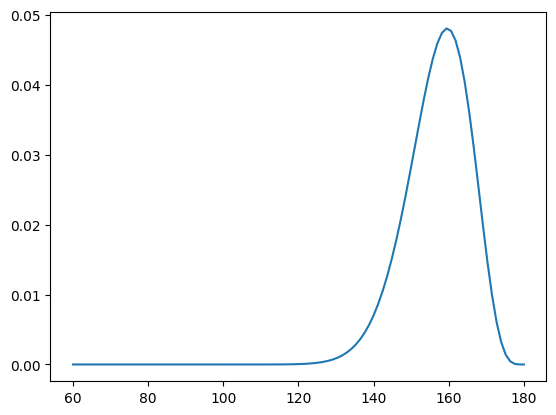

In [ ]:
min_val, max_val, avg, N = df_gym.iloc[0]['Resting_BPM'], df_gym.iloc[0]['Max_BPM'], df_gym.iloc[0]['Avg_BPM'], math.trunc(df_gym.iloc[0]['Session_Duration (hours)'] * 60)
std = mean_std_ratio_avg_max * (max_val - avg)
print(f"Min: {min_val}, Max: {max_val}, Avg: {avg}, Std: {std}, N: {N}")


genarated_heart_rates_truncnorm = genarate_heart_rates_truncnorm(min_val, max_val, avg, std, N)

print("Using truncated normal distribution")
print(f"Generated average: {np.mean(genarated_heart_rates_truncnorm):.2f}")
print(f"Generated std: {np.std(genarated_heart_rates_truncnorm, ddof=1):.2f}")
print(f"Generated min: {np.min(genarated_heart_rates_truncnorm):.2f}")
print(f"Generated max: {np.max(genarated_heart_rates_truncnorm):.2f}")

genarated_heart_rates_beta = genarate_heart_rates_beta(min_val, max_val, avg, std, N, True)

print("\n\nUsing beta distribution")
print(f"Generated average: {np.mean(genarated_heart_rates_beta):.2f}")
print(f"Generated std: {np.std(genarated_heart_rates_beta, ddof=1):.2f}")
print(f"Generated min: {np.min(genarated_heart_rates_beta):.2f}")
print(f"Generated max: {np.max(genarated_heart_rates_beta):.2f}")


Min: 60, Max: 180, Avg: 157, Std: 8.41314411902577, N: 101
Real average: 158.22
Real std: 8.25
Real min: 137.78
Real max: 174.99


Min: 66, Max: 179, Avg: 151, Std: 10.242088492727024, N: 78
Real average: 152.38
Real std: 8.99
Real min: 128.98
Real max: 169.93




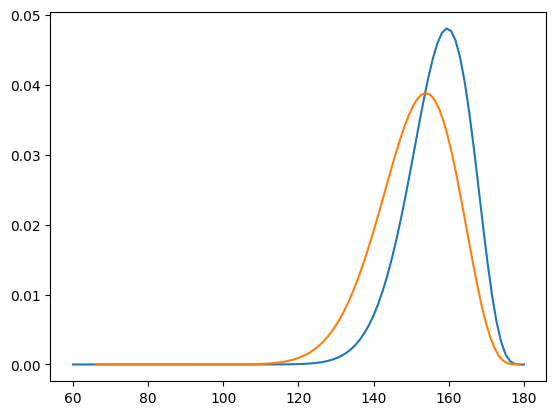

In [23]:
for index, row in df_gym.head(2).iterrows():
    min_val, max_val, avg, N = row['Resting_BPM'], row['Max_BPM'], row['Avg_BPM'], math.trunc(row['Session_Duration (hours)'] * 60)
    std = mean_std_ratio_avg_max * (max_val - avg)
    
    try:
        genarated_heart_rates_session = genarate_heart_rates_beta(min_val, max_val, avg, std, N, True)

        print(f"Min: {min_val}, Max: {max_val}, Avg: {avg}, Std: {std}, N: {N}")
        
        print(f"Real average: {np.mean(genarated_heart_rates_session):.2f}")
        print(f"Real std: {np.std(genarated_heart_rates_session, ddof=1):.2f}")
        print(f"Real min: {np.min(genarated_heart_rates_session):.2f}")
        print(f"Real max: {np.max(genarated_heart_rates_session):.2f}")

        print('\n')
    except Exception as e:
        print(f"Error for index {index}: {e}")
        continue


## First model - Fuzzy Logic

In [24]:
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [25]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [26]:
genarated_heart_rates_session

array([165.76347164, 157.84253548, 158.07592418, 152.95938501,
       165.71058747, 160.84408686, 163.27998103, 169.93440615,
       147.02613348, 155.92851297, 148.62931468, 150.60196416,
       159.23802144, 145.70582142, 147.52068422, 155.30213719,
       153.36243878, 146.81129064, 158.99786818, 161.15461295,
       142.82156294, 150.7818965 , 142.11546849, 148.46759468,
       139.27406205, 152.98742174, 163.30232399, 146.098549  ,
       148.5889595 , 138.99737594, 140.20057992, 149.8158085 ,
       159.92771749, 152.14603505, 160.43430639, 142.20250821,
       139.18356028, 153.39991641, 150.58556054, 159.99973844,
       150.37669143, 168.48974381, 144.37649765, 142.6680673 ,
       159.11748098, 160.91680429, 155.21713525, 166.98561292,
       158.71579268, 146.79069861, 157.61221379, 165.40461274,
       146.38415496, 156.44346623, 136.72069331, 128.97784911,
       150.79125273, 156.58861947, 131.75693615, 147.11741685,
       163.99032147, 142.3351167 , 152.50211991, 149.81

In [27]:
bpm_antecedent = ctrl.Antecedent(np.arange(30, 201, 1), 'BPM')
bpm_variation_antecedent = ctrl.Antecedent(np.arange(-30, 31, 1), 'BPM Variation')
intensity_consequent = ctrl.Consequent(np.arange(0, 101, 1), 'Intensity')

In [28]:
bpm_antecedent.automf(5, names=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
bpm_variation_antecedent.automf(3, names=['Negative', 'Zero', 'Positive'])
intensity_consequent.automf(3, names=['Low', 'Medium', 'High'])

c:\Users\Dani\.conda\envs\Master-IA\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


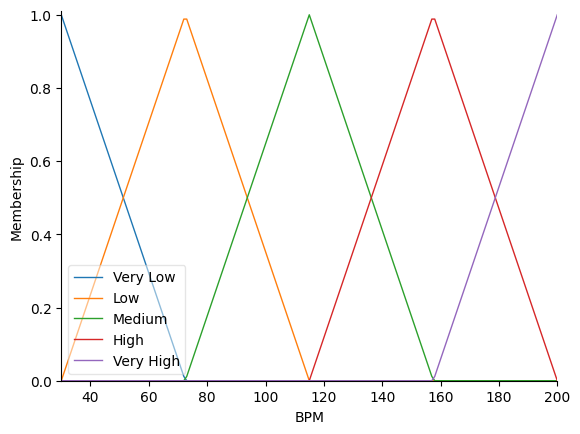

In [29]:
bpm_antecedent.view()

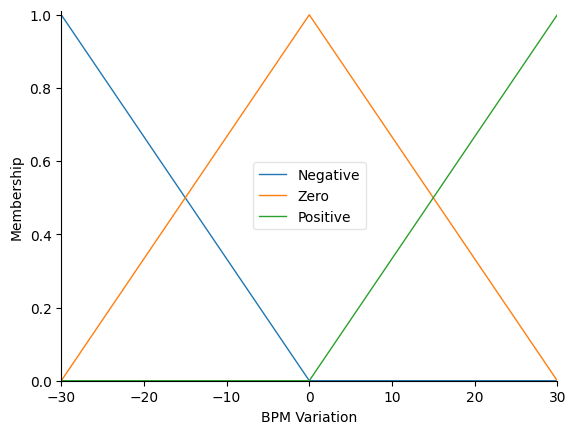

In [30]:
bpm_variation_antecedent.view()

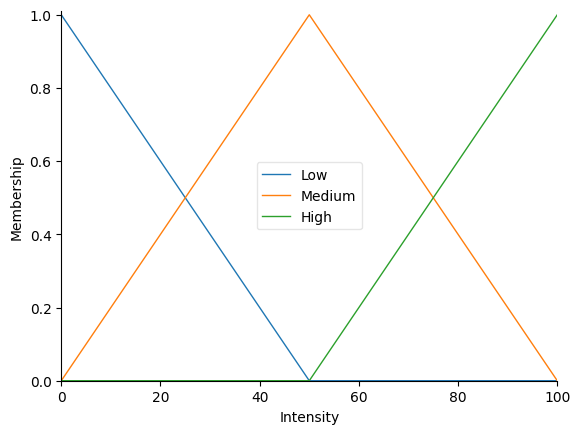

In [31]:
intensity_consequent.view()

In [32]:
# rule1 = ctrl.Rule(bpm_antecedent['Very Low'] , intensity_consequent['High'])
# rule2 = ctrl.Rule(bpm_antecedent['Low'], bpm_variation_antecedent['Negative'], intensity_consequent['High'])
# rule3 = ctrl.Rule(bpm_antecedent['Low'], bpm_variation_antecedent['Zero'], intensity_consequent['High'])
# rule4 = ctrl.Rule(bpm_antecedent['Low'], bpm_variation_antecedent['Positive'], intensity_consequent['Medium'])
# rule5 = ctrl.Rule(bpm_antecedent['Medium'], bpm_variation_antecedent['Negative'], intensity_consequent['High'])
# rule6 = ctrl.Rule(bpm_antecedent['Medium'], bpm_variation_antecedent['Zero'], intensity_consequent['Medium'])
# rule7 = ctrl.Rule(bpm_antecedent['Medium'], bpm_variation_antecedent['Positive'], intensity_consequent['Low'])
# rule8 = ctrl.Rule(bpm_antecedent['High'], bpm_variation_antecedent['Negative'], intensity_consequent['Medium'])
# rule9 = ctrl.Rule(bpm_antecedent['High'], bpm_variation_antecedent['Zero'], intensity_consequent['Low'])
# rule10 = ctrl.Rule(bpm_antecedent['High'], bpm_variation_antecedent['Positive'], intensity_consequent['Low'])
# rule11 = ctrl.Rule(bpm_antecedent['Very High'], intensity_consequent['Low'])

rule1 = ctrl.Rule(antecedent= (bpm_antecedent['Very Low'] |
                        (bpm_antecedent['Low'] & bpm_variation_antecedent['Negative']) |
                        (bpm_antecedent['Low'] & bpm_variation_antecedent['Zero']) |
                        (bpm_antecedent['Medium'] & bpm_variation_antecedent['Negative'])),
                        consequent=intensity_consequent['High'])
rule2 = ctrl.Rule(antecedent=((bpm_antecedent['Low'] & bpm_variation_antecedent['Positive']) |
                        (bpm_antecedent['Medium'] & bpm_variation_antecedent['Zero']) |
                        (bpm_antecedent['High'] & bpm_variation_antecedent['Negative'])),
                        consequent=intensity_consequent['Medium'])
rule3 = ctrl.Rule(antecedent=((bpm_antecedent['Medium'] & bpm_variation_antecedent['Positive']) |
                        (bpm_antecedent['High'] & bpm_variation_antecedent['Zero']) |
                        (bpm_antecedent['High'] & bpm_variation_antecedent['Positive'])),
                        consequent=intensity_consequent['Low'])

In [33]:
intensity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
intensity_sim = ctrl.ControlSystemSimulation(intensity_ctrl)

In [34]:
def calculate_intensity_fuzzy(bpm, bpm_variation, plot_consequent=False, plot_antecedent=False):
    intensity_sim.input['BPM'] = bpm
    intensity_sim.input['BPM Variation'] = bpm_variation
    intensity_sim.compute()
    if plot_consequent:
        intensity_consequent.view(sim=intensity_sim)
    if plot_antecedent:
        bpm_antecedent.view(sim=intensity_sim)
        bpm_variation_antecedent.view(sim=intensity_sim)
    return intensity_sim.output['Intensity']

#### Basic example

np.float64(47.384170156698524)

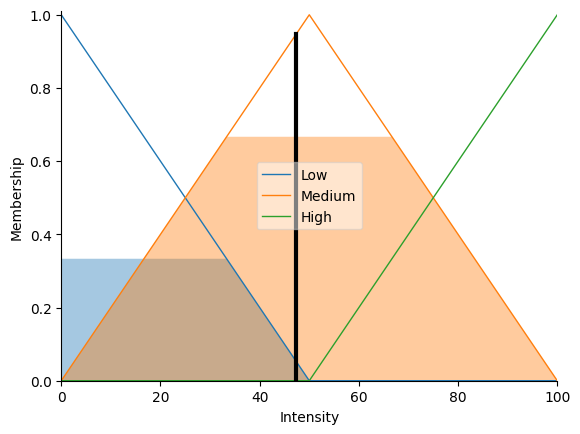

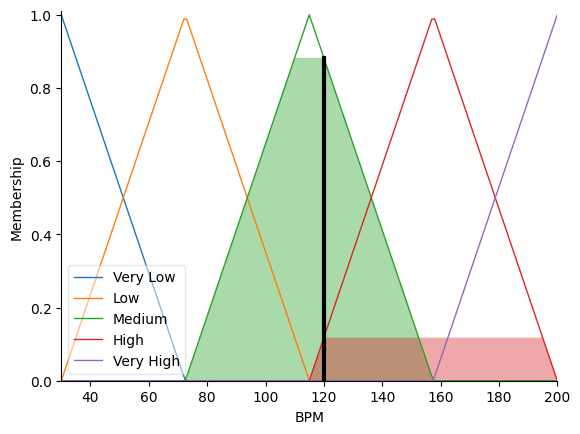

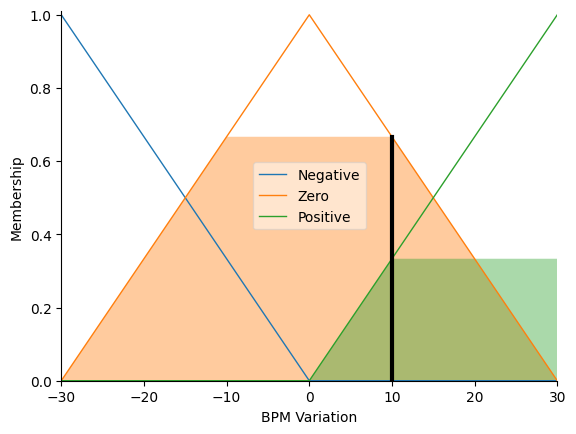

In [35]:
bpm = 120
bpm_variation = 10
calculate_intensity_fuzzy(bpm, bpm_variation, plot_consequent = True, plot_antecedent = True)

np.float64(75.45998530595496)

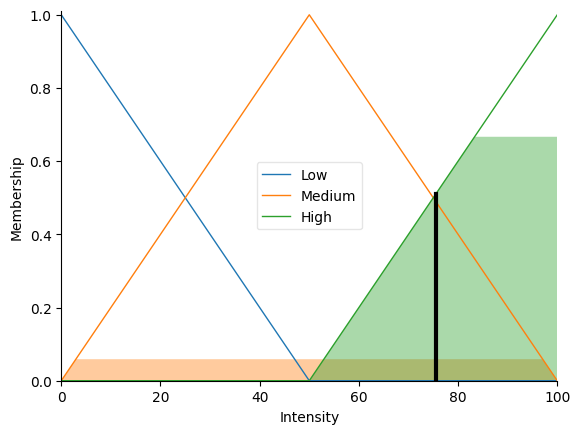

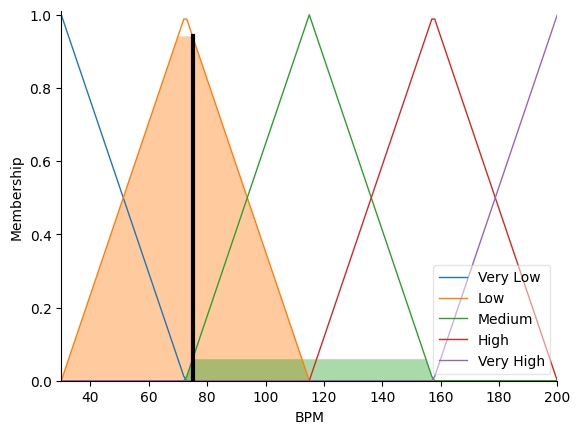

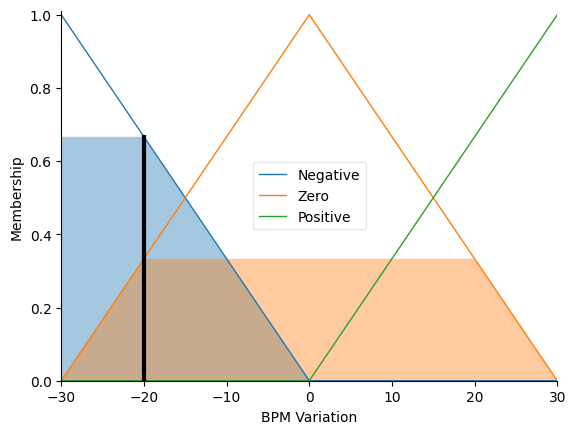

In [36]:
bpm = 75
bpm_variation = -20
calculate_intensity_fuzzy(bpm, bpm_variation, plot_consequent = True, plot_antecedent = True)

#### Dataset example

In [37]:
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [38]:
def calculate_session_moment_intensity(generated_bpms, minute, print_values=False, plot_consequent=False, plot_antecedent=False):
    bpm_registered = generated_bpms[minute]
    if minute == 0:
        bpm_variation = 0
    else:
        last_bpm = generated_bpms[minute - 1]
        bpm_variation = bpm_registered - last_bpm

    if print_values:
        print(f"Minute analized: {minute}")
        print(f"BPM registered: {bpm_registered}")
        print(f"Last BPM: {last_bpm}")
        print(f"BPM variation: {bpm_variation}")
    
    intensity = calculate_intensity_fuzzy(bpm_registered, bpm_variation, plot_consequent, plot_antecedent)
    if print_values:
        print(f"Intensity: {intensity}")
    return intensity

In [39]:
session_analized = df_gym.iloc[2]
session_analized['Workout_Type']

'Cardio'

Min: 54, Max: 167, Avg: 122, Std: 16.46049936331129, N: 66
Real average: 122.77
Real std: 18.65
Real min: 81.49
Real max: 156.98




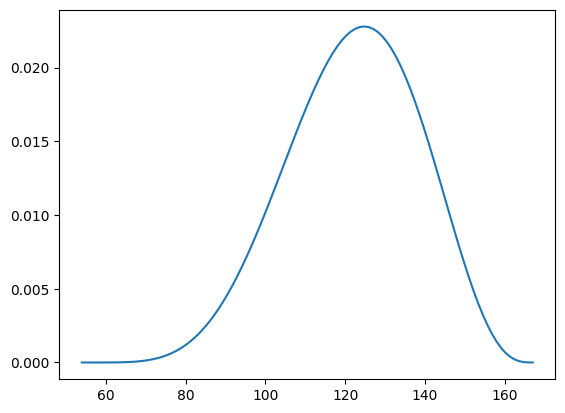

In [40]:
min_val, max_val, avg, N = session_analized['Resting_BPM'], session_analized['Max_BPM'], session_analized['Avg_BPM'], math.trunc(session_analized['Session_Duration (hours)'] * 60)
std = mean_std_ratio_avg_max * (max_val - avg)

try:
    genarated_heart_rates_session = genarate_heart_rates_beta(min_val, max_val, avg, std, N, True)

    print(f"Min: {min_val}, Max: {max_val}, Avg: {avg}, Std: {std}, N: {N}")
    
    print(f"Real average: {np.mean(genarated_heart_rates_session):.2f}")
    print(f"Real std: {np.std(genarated_heart_rates_session, ddof=1):.2f}")
    print(f"Real min: {np.min(genarated_heart_rates_session):.2f}")
    print(f"Real max: {np.max(genarated_heart_rates_session):.2f}")

    print('\n')
except Exception as e:
    print(f"Error for index {index}: {e}")

In [41]:
genarated_heart_rates_session

array([137.9994604 , 105.26451654, 126.09230001, 123.80809677,
       124.38219133, 147.78767639, 136.96664357, 124.15176477,
       148.43552304, 103.14379277, 152.9002033 , 102.86119188,
       125.11008856, 108.28159123, 117.37715439, 132.49156869,
       122.03737481, 136.88216193,  84.39084636, 108.74255686,
       125.57248231, 103.1364639 , 117.94039918,  92.64502349,
       135.84297663, 126.12972141,  94.92487822, 135.16433751,
       135.7561488 , 126.59831139, 106.63463964,  85.67930854,
       141.10419993, 142.28319166, 127.73018067,  93.48791643,
       132.23184591, 108.49889176, 124.28290345, 116.3842251 ,
       110.64544343, 137.46288091, 116.45304578, 140.67199686,
       145.17741112, 131.79070385, 150.67798847,  92.33339807,
       115.98530243, 140.84672925, 118.11075605, 148.48481668,
       147.18259133,  81.49398312, 117.47356252, 141.79893834,
       108.55941947, 143.77455183, 121.71569879,  99.61855232,
       114.40458276, 106.12385242, 156.98059506, 111.41

In [42]:
# Valor objetivo
target_value = 154.69513211

# Encontrar la posición del valor más cercano
closest_index = np.abs(genarated_heart_rates_session - target_value).argmin()
closest_value = genarated_heart_rates_session[closest_index]

print(f"Posición más cercana: {closest_index}")
print(f"Valor más cercano: {closest_value}")

Posición más cercana: 10
Valor más cercano: 152.90020330068634


Minute analized: 15
BPM registered: 132.49156869241892
Last BPM: 117.37715439440612
BPM variation: 15.114414298012804
Intensity: 43.951801538057225


c:\Users\Dani\.conda\envs\Master-IA\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


np.float64(43.951801538057225)

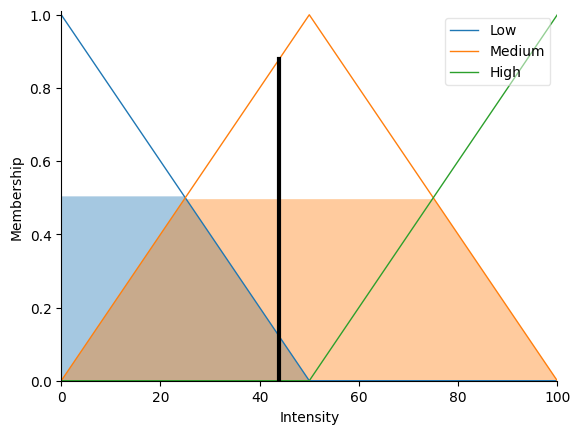

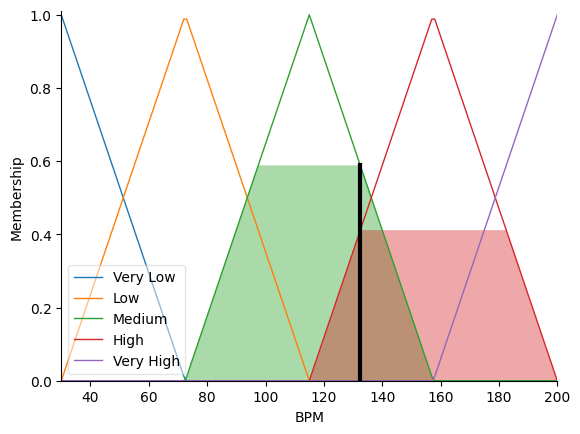

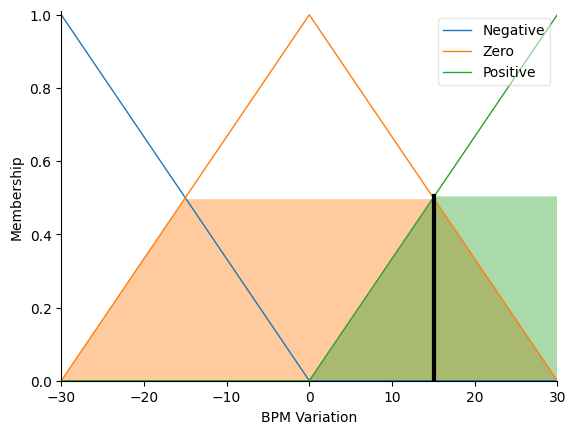

In [43]:
calculate_session_moment_intensity(genarated_heart_rates_session, minute = 15, print_values=True, plot_consequent = True, plot_antecedent = True)

Minute analized: 20
BPM registered: 125.57248230998022
Last BPM: 108.74255686193112
BPM variation: 16.829925448049096
Intensity: 42.40864351679399


np.float64(42.40864351679399)

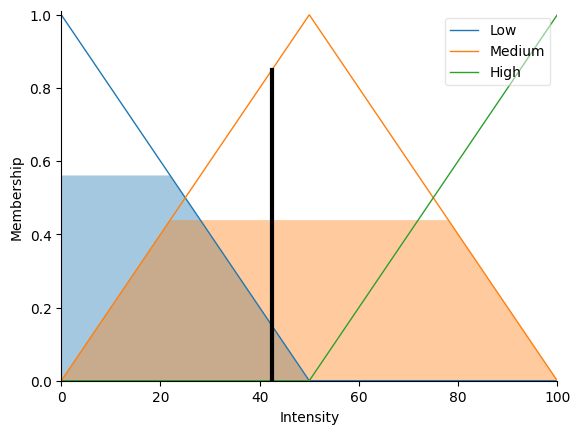

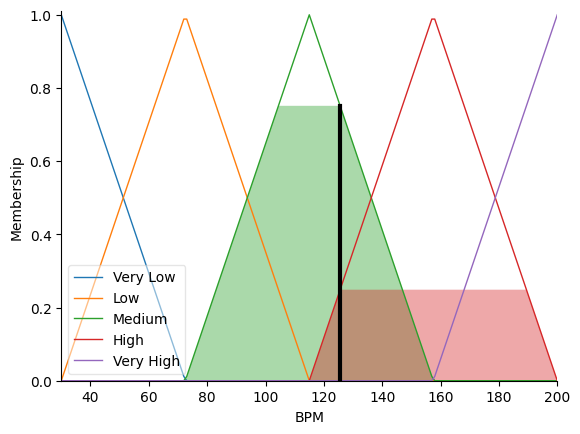

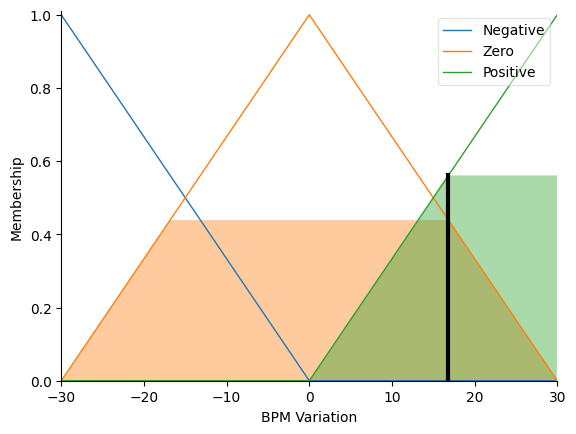

In [44]:
calculate_session_moment_intensity(genarated_heart_rates_session, minute = 20, print_values=True, plot_consequent = True, plot_antecedent = True)

Minute analized: 53
BPM registered: 81.49398311781364
Last BPM: 147.1825913300649
BPM variation: -65.68860821225125
Intensity: 82.71729537997807


np.float64(82.71729537997807)

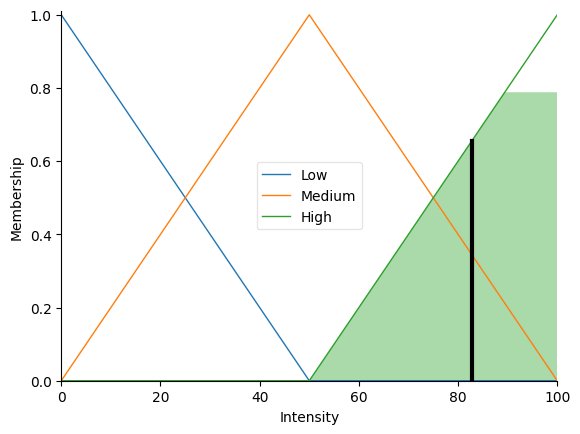

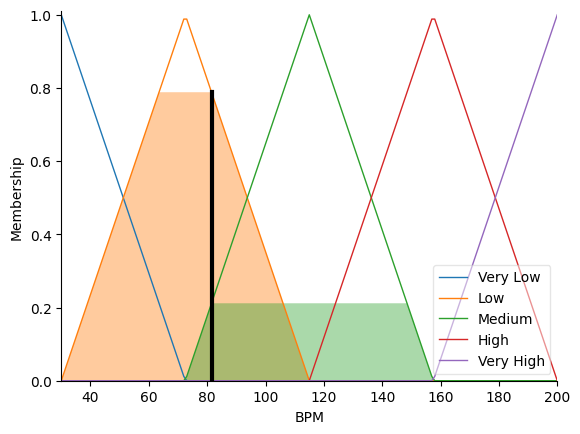

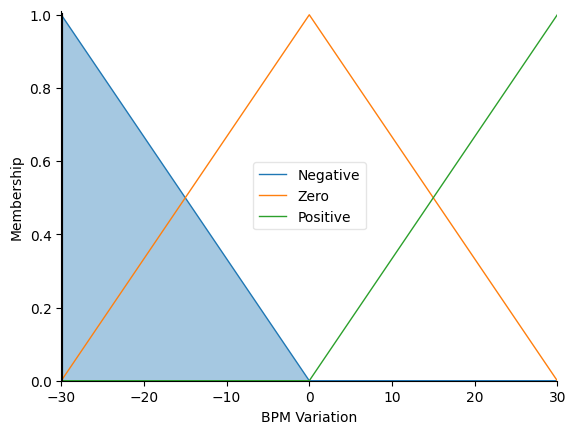

In [45]:
calculate_session_moment_intensity(genarated_heart_rates_session, minute = 53, print_values=True, plot_consequent = True, plot_antecedent = True)

## Second model - Kmeans

TODO:
- Ver aproximaciones hídridas (collaborative filtering y content-based filtering)

In [46]:
def get_song_cluster(df, song_id, using_id=True):
    if using_id:
        song = df[df['track_id'] == song_id]
    else:
        song = df[df['track_name'] == song_id]
    
    if song.empty:
        return None
    else:
        return int(song.iloc[0]['Cluster'])
    
def get_most_common_cluster(df, song_id_list, using_id=True):
    cluster_counts = {}
    for song_id in song_id_list:
        cluster = get_song_cluster(df, song_id, using_id)
        if cluster is not None:
            if cluster in cluster_counts:
                cluster_counts[cluster] += 1
            else:
                cluster_counts[cluster] = 1
    return max(cluster_counts, key=cluster_counts.get) if cluster_counts else None


def get_recommended_songs(df, energy_level, song_id_list, using_id=True):
    energy_difs = []
    cluster = get_most_common_cluster(df, song_id_list, using_id)
    if cluster is not None:
        songs_in_cluster = df[df['Cluster'] == cluster]
        for _, row in songs_in_cluster.iterrows():
            dif = abs(row['energy'] - energy_level)
            energy_difs.append(dif)
        songs_in_cluster['Energy Dif'] = energy_difs
        songs_in_cluster = songs_in_cluster.sort_values(by='Energy Dif')
        return songs_in_cluster.head(5)
    return None


In [47]:
used_features = ['danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']#, 'energy']
X = df_spotify[used_features]

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[ 0.6420147 ,  1.36704001, -0.48125259, -0.33396088, -0.3779849 ,
         0.03192873,  0.04283347],
       [ 0.4903842 ,  0.58573644, -0.68854664, -0.46872623, -0.35921049,
         0.78252502, -0.77729134],
       [ 0.13887713,  1.10002492, -0.32430138, -0.43685604, -0.377881  ,
         0.43939529,  0.11613324],
       [ 0.43524584,  0.98425145, -0.04988353, -0.66768722, -0.37794285,
        -1.00174958,  0.03985985],
       [-0.03343026,  0.68511424, -0.70236625, -0.43275845, -0.3779849 ,
         0.91977691,  0.1149438 ]])

### Dimensionality reduction - PCA

#### 2 dimensions

In [49]:
from sklearn.decomposition import PCA

Test with 2 dimensions for better cluster visualiation

In [50]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_reduced_2d = pca.transform(X_scaled)
X_reduced_2d[:5]

array([[ 0.90083248, -0.84978025],
       [ 0.99084869, -0.07491762],
       [ 0.83351821, -0.8548886 ],
       [ 0.30917307, -1.0337152 ],
       [ 0.7408732 , -0.63458126]])

We obtain the best number of clusters using the elbow method and Davies-Bouldin index

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
max_k = 12

wcss, db, silh = [], [], []

for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    kmeans.fit(X_reduced_2d)
    wcss.append(kmeans.inertia_)
    
    #Davies-Bouldin score
    db.append(davies_bouldin_score(X_reduced_2d, kmeans.labels_))

    #Silhouette score
    #silh.append(silhouette_score(X_reduced_2d, kmeans.labels_))



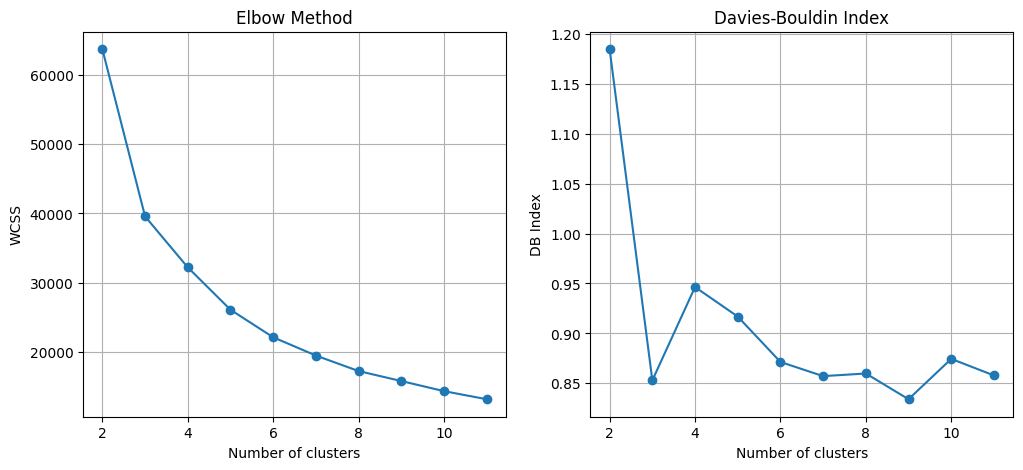

In [52]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_k), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(range(2, max_k), db, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('DB Index')
plt.grid()
plt.show()

Observing the graphs we select 7 clusters

In [53]:
kmeans_reduced_2d = KMeans(n_clusters=9, random_state=RANDOM_STATE)
df_spotify_kmeans_2d = df_spotify.copy()
df_spotify_kmeans_2d['Cluster'] = kmeans_reduced_2d.fit_predict(X_reduced_2d)
df_spotify_kmeans_2d.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Cluster
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,6
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,6
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,6
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,6


In [54]:
df_spotify_kmeans_2d['Cluster'].value_counts()

Cluster
6    5996
0    5208
1    4874
2    4141
8    4014
7    3164
5    2597
3    1912
4     922
Name: count, dtype: int64

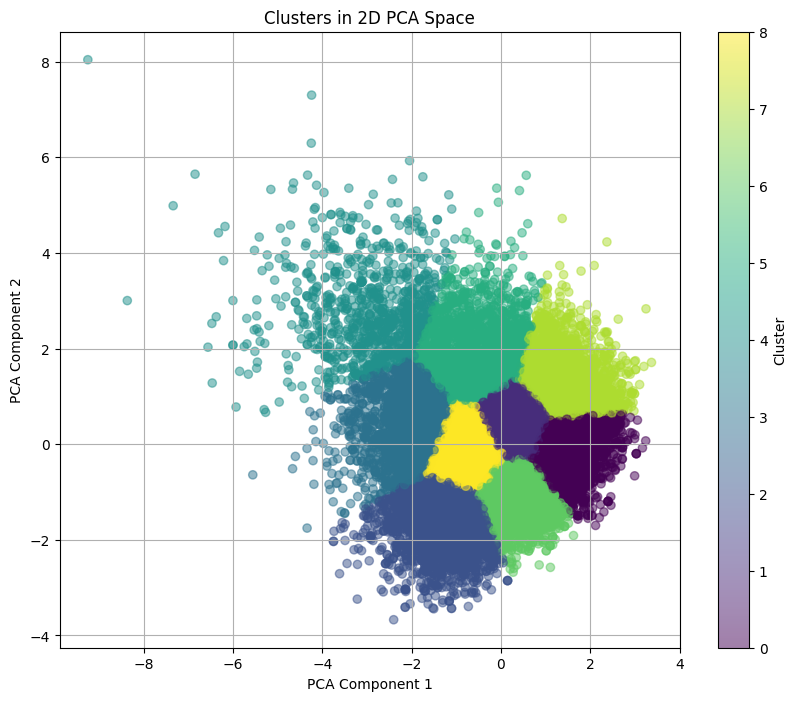

In [55]:
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced_2d[:, 0], X_reduced_2d[:, 1], c=df_spotify_kmeans_2d['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [56]:
df_spotify_kmeans_2d.head(20)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Cluster
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1,0.0583,0.10200,0.000000,0.0653,0.518,122.036,194754,6
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1,0.0373,0.07240,0.004210,0.3570,0.693,99.972,162600,0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.432,0,0.0742,0.07940,0.000023,0.1100,0.613,124.008,176616,6
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.778,1,0.1020,0.02870,0.000009,0.2040,0.277,121.956,169093,6
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.672,1,0.0359,0.08030,0.000000,0.0833,0.725,123.976,189052,6
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-5.385,1,0.1270,0.07990,0.000000,0.1430,0.585,124.982,163049,6
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.788,0,0.0623,0.18700,0.000000,0.1760,0.152,112.648,187675,2
7,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.419,0,0.0434,0.03350,0.000005,0.1110,0.367,127.936,207619,6
8,7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.562,1,0.0565,0.02490,0.000004,0.6370,0.366,127.015,193187,6
9,1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.552,1,0.0320,0.05670,0.000000,0.0919,0.590,124.957,253040,6


In [57]:
features_to_show = ['track_id', 'track_name'] + ['Cluster', 'energy','Energy Dif'] + used_features 
features_to_show

['track_id',
 'track_name',
 'Cluster',
 'energy',
 'Energy Dif',
 'danceability',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'valence',
 'tempo']

In [58]:
print('Cluster:', get_most_common_cluster(df_spotify_kmeans_2d, ['6f807x0ima9a1j3VPbc7VN', '0r7CVbZTWZgbTCYdfa2P31', '1z1Hg7Vb0AhHDiEmnDE79l', '2v3DuCVBbopteJqdM7aKQK'], using_id=True))
recommendations = get_recommended_songs(df_spotify_kmeans_2d, 0.5, ['6f807x0ima9a1j3VPbc7VN', '0r7CVbZTWZgbTCYdfa2P31', '1z1Hg7Vb0AhHDiEmnDE79l', '2v3DuCVBbopteJqdM7aKQK'])
recommendations[features_to_show]

Cluster: 6


C:\Users\Dani\AppData\Local\Temp\ipykernel_3112\2131376290.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_in_cluster['Energy Dif'] = energy_difs


,track_id,track_name,Cluster,energy,Energy Dif,danceability,loudness,speechiness,acousticness,instrumentalness,valence,tempo
18624,483rz2B4gM6w7m21gsfnTT,"Culpa, Tengo",6,0.500,0.000,0.708,-8.359,0.130,0.00261,0.000009,0.709,185.786
5952,0yjsqPohhEH9engTAwqWYR,Sticky Situation,6,0.501,0.001,0.795,-7.359,0.151,0.01910,0.000000,0.105,150.024
8984,5ry2OE6R2zPQFDO85XkgRb,Money In The Grave (Drake ft. Rick Ross),6,0.502,0.002,0.831,-4.045,0.046,0.10100,0.000000,0.101,100.541
18367,5ry2OE6R2zPQFDO85XkgRb,Money In The Grave (Drake ft. Rick Ross),6,0.502,0.002,0.831,-4.045,0.046,0.10100,0.000000,0.101,100.541
19779,5ry2OE6R2zPQFDO85XkgRb,Money In The Grave (Drake ft. Rick Ross),6,0.502,0.002,0.831,-4.045,0.046,0.10100,0.000000,0.101,100.541


In [59]:
get_most_common_cluster(df_spotify_kmeans_2d, ['6f807x0ima9a1j3VPbc7VN', '0r7CVbZTWZgbTCYdfa2P31', '1z1Hg7Vb0AhHDiEmnDE79l', '2v3DuCVBbopteJqdM7aKQK'], using_id=True)

6

In [60]:
df_spotify['energy']

0        0.916
1        0.815
2        0.931
3        0.930
4        0.833
         ...  
32828    0.922
32829    0.786
32830    0.821
32831    0.888
32832    0.884
Name: energy, Length: 32828, dtype: float64

#### Optimal dimensions

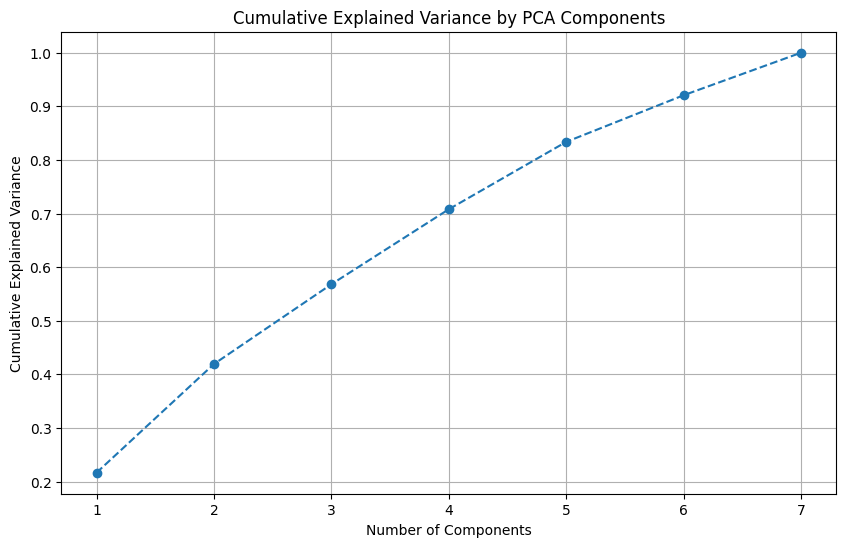

In [61]:
pca = PCA()
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [62]:
pca = PCA(n_components=5)
pca.fit(X_scaled)
X_reduced_opt = pca.transform(X_scaled)
X_reduced_opt[:5]

array([[ 0.90083248, -0.84978025, -0.53031619, -0.39271532, -0.08127227],
       [ 0.99084869, -0.07491762, -1.00047701, -0.77609626,  0.14593388],
       [ 0.83351821, -0.8548886 , -0.27756156, -0.42799622,  0.16922913],
       [ 0.30917307, -1.0337152 , -0.24914846, -0.04996548, -0.87626755],
       [ 0.7408732 , -0.63458126, -0.40657351, -0.66742608,  0.72469425]])

In [63]:
max_k = 12

wcss, db, silh = [], [], []

for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    kmeans.fit(X_reduced_opt)
    wcss.append(kmeans.inertia_)
    
    #Davies-Bouldin score
    db.append(davies_bouldin_score(X_reduced_opt, kmeans.labels_))

    #Silhouette score
    #silh.append(silhouette_score(X_reduced_opt, kmeans.labels_))

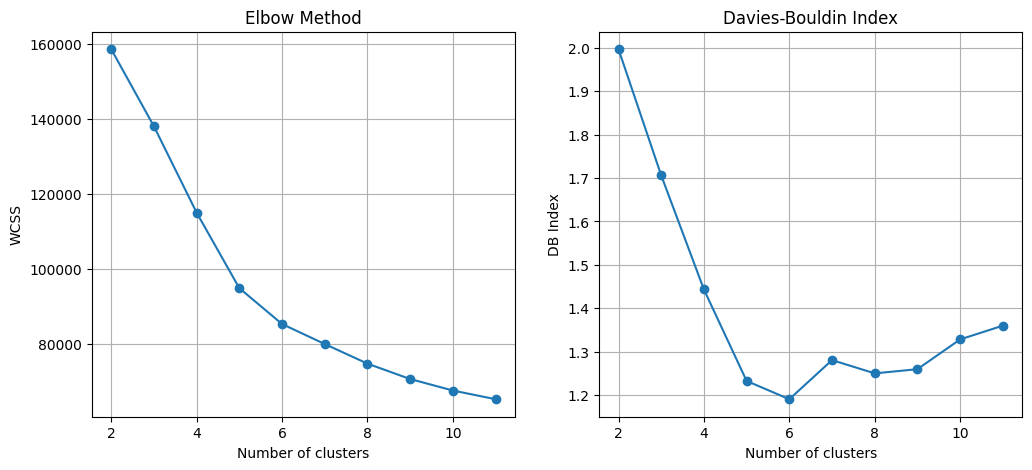

In [64]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_k), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(range(2, max_k), db, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('DB Index')
plt.grid()
plt.show()

In [65]:
kmeans_reduced_opt = KMeans(n_clusters=6, random_state=RANDOM_STATE)
df_spotify_kmeans_opt = df_spotify.copy()
df_spotify_kmeans_opt['Cluster'] = kmeans_reduced_opt.fit_predict(X_reduced_opt)
df_spotify_kmeans_opt.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Cluster
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,1
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,1
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,1
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,3
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,1


In [66]:
df_spotify_kmeans_opt['Cluster'].value_counts()

Cluster
1    9824
3    8377
0    4270
4    4035
2    3643
5    2679
Name: count, dtype: int64

In [67]:
df_spotify_kmeans_opt.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Cluster
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,1
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,1
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,1
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,3
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,1


In [68]:
print('Cluster:', get_most_common_cluster(df_spotify_kmeans_2d, ['6f807x0ima9a1j3VPbc7VN', '0r7CVbZTWZgbTCYdfa2P31', '1z1Hg7Vb0AhHDiEmnDE79l', '75FpbthrwQmzHlBJLuGdC7'], using_id=True))
recommendations = get_recommended_songs(df_spotify_kmeans_2d, 0.76, ['6f807x0ima9a1j3VPbc7VN', '0r7CVbZTWZgbTCYdfa2P31', '1z1Hg7Vb0AhHDiEmnDE79l', '75FpbthrwQmzHlBJLuGdC7'])
recommendations[features_to_show]

Cluster: 6


C:\Users\Dani\AppData\Local\Temp\ipykernel_3112\2131376290.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_in_cluster['Energy Dif'] = energy_difs


,track_id,track_name,Cluster,energy,Energy Dif,danceability,loudness,speechiness,acousticness,instrumentalness,valence,tempo
154,09CtPGIpYB4BrO8qb1RGsF,Sorry,6,0.76,0.0,0.654,-3.669,0.0450,0.0797,0.0000,0.410,99.945
1719,09CtPGIpYB4BrO8qb1RGsF,Sorry,6,0.76,0.0,0.654,-3.669,0.0450,0.0797,0.0000,0.410,99.945
30293,44pS6uiJC5PX5hTamjd3ly,Can't Fear The Night,6,0.76,0.0,0.595,-6.277,0.0287,0.0135,0.0181,0.707,128.039
29660,5X9aLsGQQ3TQLbrpyPhwci,Keep On,6,0.76,0.0,0.552,-4.967,0.0695,0.1900,0.0000,0.477,128.055
25060,6nTcn8CybBcx0t7IaXEJ6O,Thank God I Found You (feat. Joe & Nas) - Make...,6,0.76,0.0,0.608,-5.851,0.2420,0.0129,0.0000,0.366,168.211


In [70]:
print('Cluster:', get_most_common_cluster(df_spotify_kmeans_2d, ['6f807x0ima9a1j3VPbc7VN', '0r7CVbZTWZgbTCYdfa2P31', '1z1Hg7Vb0AhHDiEmnDE79l', '75FpbthrwQmzHlBJLuGdC7'], using_id=True))
recommendations = get_recommended_songs(df_spotify_kmeans_2d, 0.21, ['6f807x0ima9a1j3VPbc7VN', '0r7CVbZTWZgbTCYdfa2P31', '1z1Hg7Vb0AhHDiEmnDE79l', '75FpbthrwQmzHlBJLuGdC7'])
recommendations[features_to_show]

Cluster: 6


C:\Users\Dani\AppData\Local\Temp\ipykernel_3112\2131376290.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_in_cluster['Energy Dif'] = energy_difs


,track_id,track_name,Cluster,energy,Energy Dif,danceability,loudness,speechiness,acousticness,instrumentalness,valence,tempo
21779,08MbvwVOZdMNESjkoVdXxE,Where Do We Go,6,0.351,0.141,0.850,-5.536,0.0517,0.02630,0.003700,0.4120,138.045
14613,2YdyY8Wi7FmVcJ9oZqSBzf,Retrograde,6,0.384,0.174,0.600,-6.344,0.0360,0.00352,0.000081,0.3620,137.955
5505,5t7SHDPq9Ef7O92chdneBs,Do It Again,6,0.388,0.178,0.671,-8.302,0.0632,0.04100,0.000302,0.6340,158.687
9384,0n2m8ZiQt4Aqcu6IAfPc96,Who Do You Love?,6,0.407,0.197,0.681,-9.795,0.5040,0.03050,0.000000,0.1550,193.122
9827,0WEI3cNqwQ1nyWYsBw3n7f,"""I TRIED FOR YEARS... NOBODY LISTENED""",6,0.408,0.198,0.914,-6.712,0.1410,0.02680,0.001790,0.0944,140.026
